# Activity vs Calories

In [242]:
# importing
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
daily_activity = pd.read_csv("dailyActivity_merged.csv") 
hourly_data = pd.read_csv("hourlyCalories_merged.csv")
minuteCaloriesWide = pd.read_csv("minuteCaloriesWide_merged.csv")

## Understanding the data

### i) daily_activity

In [6]:
daily_activity.shape

(940, 15)

In [7]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [8]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


### ii) hourly_data

In [187]:
hourly_data.describe()


,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


In [188]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [208]:
hourly_data.shape

(22099, 4)

### iii) minuteCaloriesWide

In [203]:
minuteCaloriesWide.head()

,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59,TotalCalories,Hour
0,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,...,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438,68.740098,0
1,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,48.133799,1
2,1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,47.189999,2
3,1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,52.695498,3
4,1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,47.347299,4


In [204]:
minuteCaloriesWide.describe()

,Id,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,Calories08,...,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59,TotalCalories,Hour
count,2.164500e+04,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,...,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000
mean,4.836965e+09,1.622629,1.626377,1.637824,1.635515,1.637997,1.638306,1.639910,1.629520,1.623686,...,1.620958,1.618227,1.621229,1.615972,1.608714,1.612657,1.611715,1.612110,97.317648,11.423100
std,2.424088e+09,1.398418,1.395083,1.408828,1.419590,1.433532,1.438253,1.435465,1.424092,1.411596,...,1.407914,1.400498,1.408974,1.392530,1.376827,1.369097,1.374954,1.373888,60.835419,6.928948
min,1.503960e+09,0.702700,0.702700,0.702700,0.702700,0.702700,0.702700,0.702700,0.702700,0.702700,...,0.702700,0.702700,0.702700,0.702700,0.702700,0.702700,0.702700,0.000000,42.162001,0.000000
25%,2.320127e+09,0.935700,0.935700,0.937680,0.935700,0.935700,0.935700,0.935700,0.935700,0.935700,...,0.935700,0.935700,0.935700,0.935700,0.935700,0.935700,0.935700,0.935700,62.888980,5.000000
50%,4.445115e+09,1.217600,1.217600,1.220400,1.218500,1.218500,1.218500,1.218500,1.217600,1.217600,...,1.217600,1.217600,1.217600,1.217600,1.217600,1.217600,1.217600,1.217600,82.523997,11.000000
75%,6.962181e+09,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,...,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,107.865609,17.000000
max,8.877689e+09,19.727337,19.727337,19.727337,19.727337,19.727337,19.727337,19.727337,19.727337,19.727337,...,19.749947,19.749947,19.749947,19.749947,19.727337,19.727337,19.727337,19.727337,948.493082,23.000000


In [207]:
minuteCaloriesWide.shape

(21645, 64)

In [206]:
minuteCaloriesWide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             21645 non-null  int64  
 1   ActivityHour   21645 non-null  object 
 2   Calories00     21645 non-null  float64
 3   Calories01     21645 non-null  float64
 4   Calories02     21645 non-null  float64
 5   Calories03     21645 non-null  float64
 6   Calories04     21645 non-null  float64
 7   Calories05     21645 non-null  float64
 8   Calories06     21645 non-null  float64
 9   Calories07     21645 non-null  float64
 10  Calories08     21645 non-null  float64
 11  Calories09     21645 non-null  float64
 12  Calories10     21645 non-null  float64
 13  Calories11     21645 non-null  float64
 14  Calories12     21645 non-null  float64
 15  Calories13     21645 non-null  float64
 16  Calories14     21645 non-null  float64
 17  Calories15     21645 non-null  float64
 18  Calori

## Number of Unique Users

In [9]:
daily_activity['Id'].nunique()

33

## Check Missing Values

In [10]:
print(daily_activity.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


## Descriptive Statistics

In [11]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


## Show rows with Zero Calories

In [12]:
daily_activity[daily_activity["Calories"] == 0 ]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,1503960366,5/12/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
653,6290855005,5/10/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
817,8253242879,4/30/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
879,8583815059,5/12/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0


## Show rows with Zero TotalSteps

In [15]:
daily_activity_cleaned[ daily_activity_cleaned["TotalSteps"] == 0 ]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
104,1844505072,4/24/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
105,1844505072,4/25/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
106,1844505072,4/26/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
112,1844505072,5/2/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1348
117,1844505072,5/7/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,8792009665,5/6/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
905,8792009665,5/7/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
906,8792009665,5/8/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688
907,8792009665,5/9/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1688


## Show Rows with Zero LoggedActivitiesDistance

In [21]:
daily_activity_cleaned[  daily_activity_cleaned["LoggedActivitiesDistance"] == 0 ]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


## Show Rows with Zero VeryActiveDistance

In [22]:
daily_activity_cleaned[  daily_activity_cleaned["VeryActiveDistance"] == 0 ]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
31,1624580081,4/12/2016,8163,5.31,5.31,0.0,0.0,0.00,5.31,0.00,0,0,146,1294,1432
32,1624580081,4/13/2016,7007,4.55,4.55,0.0,0.0,0.00,4.55,0.00,0,0,148,1292,1411
33,1624580081,4/14/2016,9107,5.92,5.92,0.0,0.0,0.00,5.91,0.01,0,0,236,1204,1572
34,1624580081,4/15/2016,1510,0.98,0.98,0.0,0.0,0.00,0.97,0.00,0,0,96,1344,1344
35,1624580081,4/16/2016,5370,3.49,3.49,0.0,0.0,0.00,3.49,0.00,0,0,176,1264,1463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,8792009665,5/3/2016,2421,1.55,1.55,0.0,0.0,0.00,1.55,0.00,0,0,156,739,2297
902,8792009665,5/4/2016,2283,1.46,1.46,0.0,0.0,0.00,1.46,0.00,0,0,129,848,2067
914,8877689391,4/17/2016,15118,8.87,8.87,0.0,0.0,0.07,8.79,0.00,58,15,307,1060,3545
920,8877689391,4/23/2016,11200,7.43,7.43,0.0,0.0,0.00,7.40,0.01,102,6,300,1032,3891


In [173]:
# no need to drop any other 0 rows since it is related by their titles and will not affect the analysis in a wrong way

# Graphics

## Total Steps

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


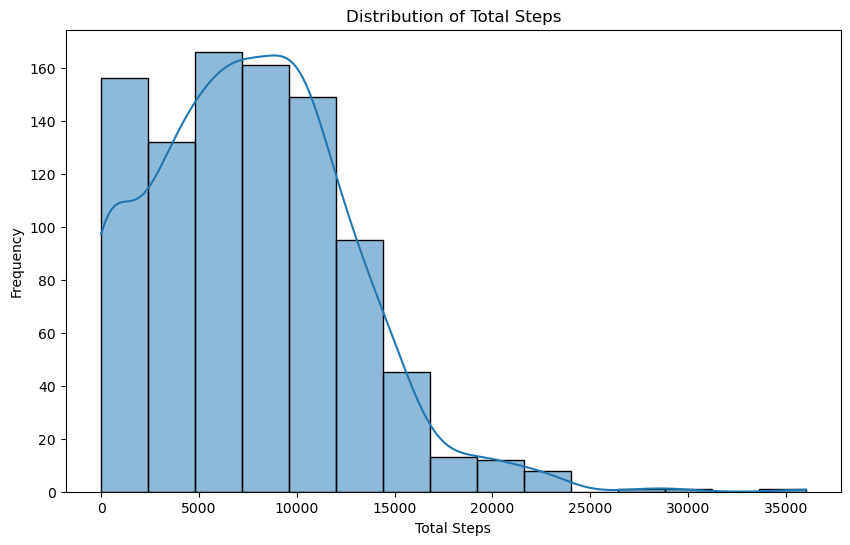

In [270]:
plt.figure(figsize=(10, 6))
sns.histplot(daily_activity['TotalSteps'], kde=True, bins=15)
plt.title('Distribution of Total Steps')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.show()

Different Active Distances

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

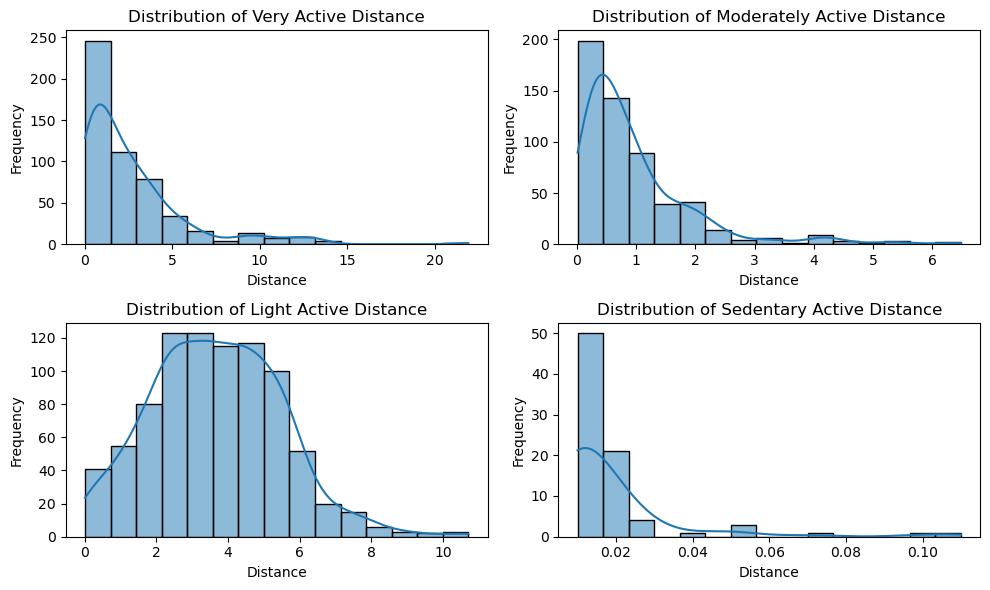

In [275]:
fig,axes = plt.subplots(2,2,figsize=(10,6))
sns.histplot(daily_activity[daily_activity["VeryActiveDistance"]>0]['VeryActiveDistance'], kde=True, bins=15,ax=axes[0,0])
axes[0,0].set_title('Distribution of Very Active Distance')
axes[0,0].set_xlabel('Distance')
axes[0,0].set_ylabel('Frequency')
sns.histplot(daily_activity[daily_activity["ModeratelyActiveDistance"]>0]['ModeratelyActiveDistance'], kde=True, bins=15,ax=axes[0,1])
axes[0,1].set_title('Distribution of Moderately Active Distance')
axes[0,1].set_xlabel('Distance')
axes[0,1].set_ylabel('Frequency')
sns.histplot(daily_activity[daily_activity["LightActiveDistance"]>0]['LightActiveDistance'], kde=True, bins=15,ax=axes[1,0])
axes[1,0].set_title('Distribution of Light Active Distance')
axes[1,0].set_xlabel('Distance')
axes[1,0].set_ylabel('Frequency')
sns.histplot(daily_activity[daily_activity["SedentaryActiveDistance"]>0]['SedentaryActiveDistance'], kde=True, bins=15,ax=axes[1,1])
axes[1,1].set_title('Distribution of Sedentary Active Distance')
axes[1,1].set_xlabel('Distance')
axes[1,1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


Different Active Minutes

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

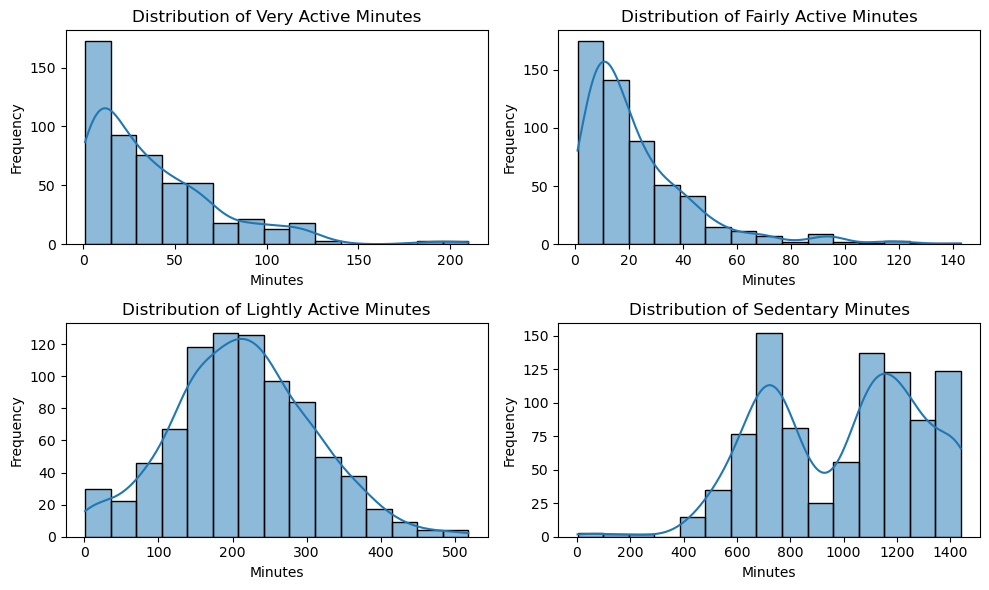

In [324]:
fig,axes = plt.subplots(2,2,figsize=(10,6))
sns.histplot(daily_activity[daily_activity["VeryActiveMinutes"]>0]['VeryActiveMinutes'], kde=True, bins=15,ax=axes[0,0])
axes[0,0].set_title('Distribution of Very Active Minutes')
axes[0,0].set_xlabel('Minutes')
axes[0,0].set_ylabel('Frequency')
sns.histplot(daily_activity[daily_activity["FairlyActiveMinutes"]>0]['FairlyActiveMinutes'], kde=True, bins=15,ax=axes[0,1])
axes[0,1].set_title('Distribution of Fairly Active Minutes')
axes[0,1].set_xlabel('Minutes')
axes[0,1].set_ylabel('Frequency')
sns.histplot(daily_activity[daily_activity["LightlyActiveMinutes"]>0]['LightlyActiveMinutes'], kde=True, bins=15,ax=axes[1,0])
axes[1,0].set_title('Distribution of Lightly Active Minutes')
axes[1,0].set_xlabel('Minutes')
axes[1,0].set_ylabel('Frequency')
sns.histplot(daily_activity[daily_activity["SedentaryMinutes"]>0]['SedentaryMinutes'], kde=True, bins=15,ax=axes[1,1])
axes[1,1].set_title('Distribution of Sedentary Minutes')
axes[1,1].set_xlabel('Minutes')
axes[1,1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

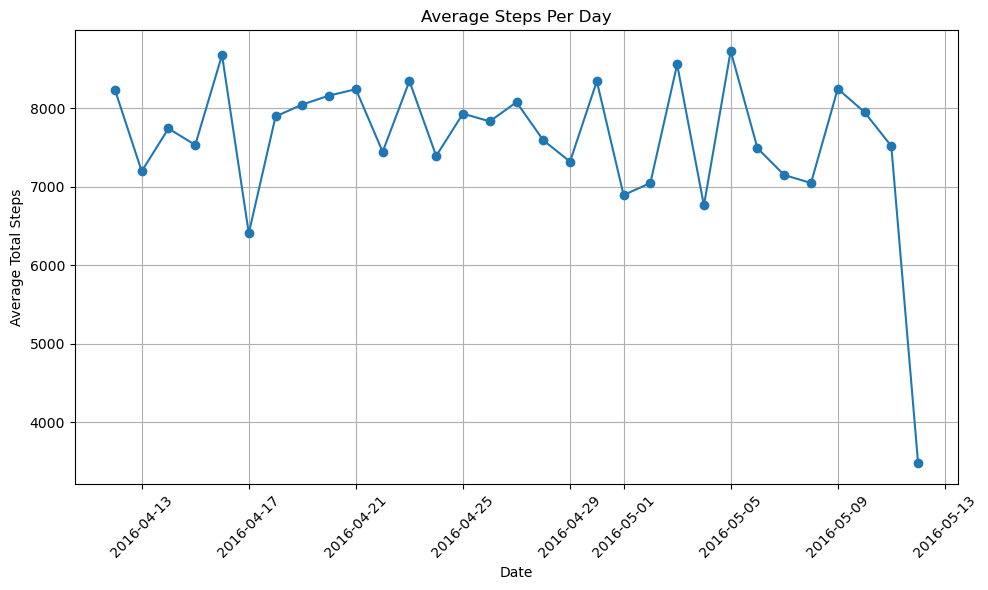

In [277]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format='%m/%d/%Y')

average_steps_per_day = daily_activity.groupby('ActivityDate')['TotalSteps'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_steps_per_day['ActivityDate'], average_steps_per_day['TotalSteps'], marker='o', linestyle='-')
plt.title('Average Steps Per Day')
plt.xlabel('Date')
plt.ylabel('Average Total Steps')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Max Date

In [278]:
last_date = daily_activity['ActivityDate'].max()
last_date

Timestamp('2016-05-12 00:00:00')

In [279]:
daily_activity = daily_activity[daily_activity['ActivityDate'] < last_date]


/var/folders/bc/q2wd2x690p93m182cp8bnly80000gn/T/ipykernel_92530/2321782894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format='%m/%d/%Y')


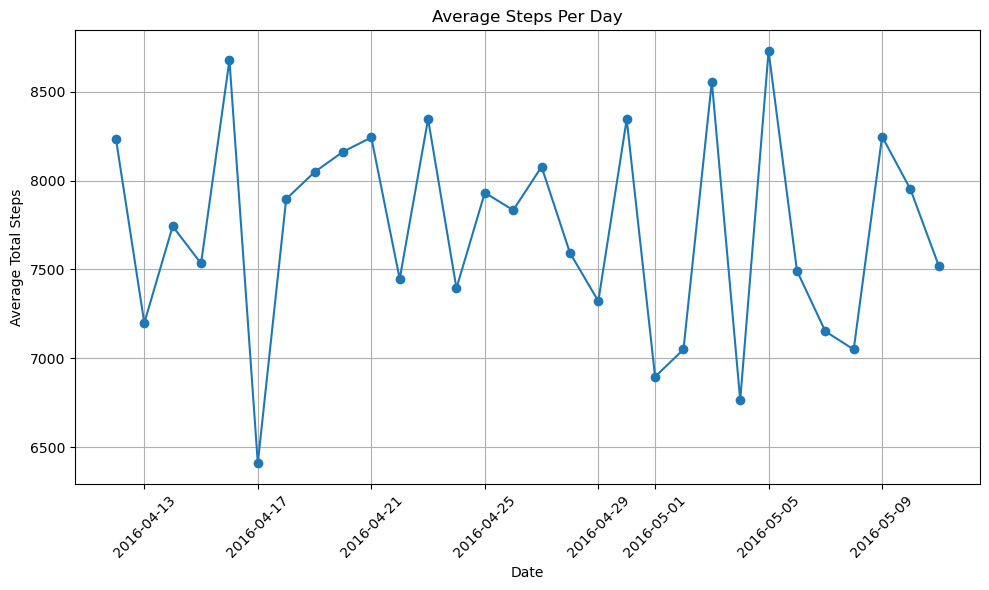

In [280]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format='%m/%d/%Y')

average_steps_per_day = daily_activity.groupby('ActivityDate')['TotalSteps'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_steps_per_day['ActivityDate'], average_steps_per_day['TotalSteps'], marker='o', linestyle='-')
plt.title('Average Steps Per Day')
plt.xlabel('Date')
plt.ylabel('Average Total Steps')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

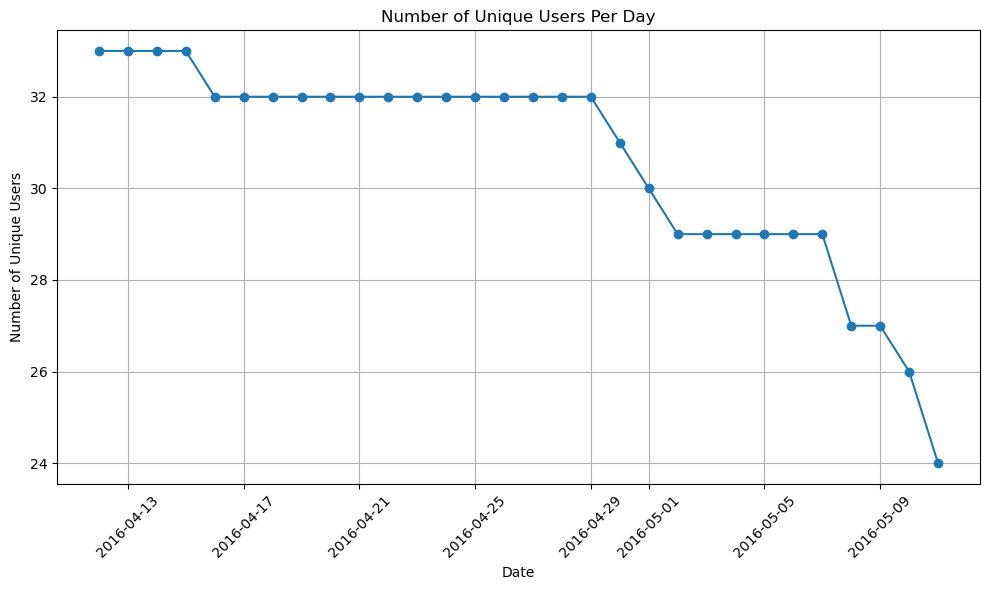

In [282]:
unique_ids_per_day = daily_activity.groupby('ActivityDate')['Id'].nunique().reset_index()
unique_ids_per_day.columns = ['ActivityDate', 'UniqueIDs']
 
plt.figure(figsize=(10, 6))
plt.plot(unique_ids_per_day['ActivityDate'], unique_ids_per_day['UniqueIDs'], marker='o', linestyle='-')
plt.title('Number of Unique Users Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Unique Users')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

the reason of the graphic above is to predict the preceding one's behavior e.g., if decrease is about the shortage of the users or same amount of users but they all walked less?

answer: shortage of users (prediction)

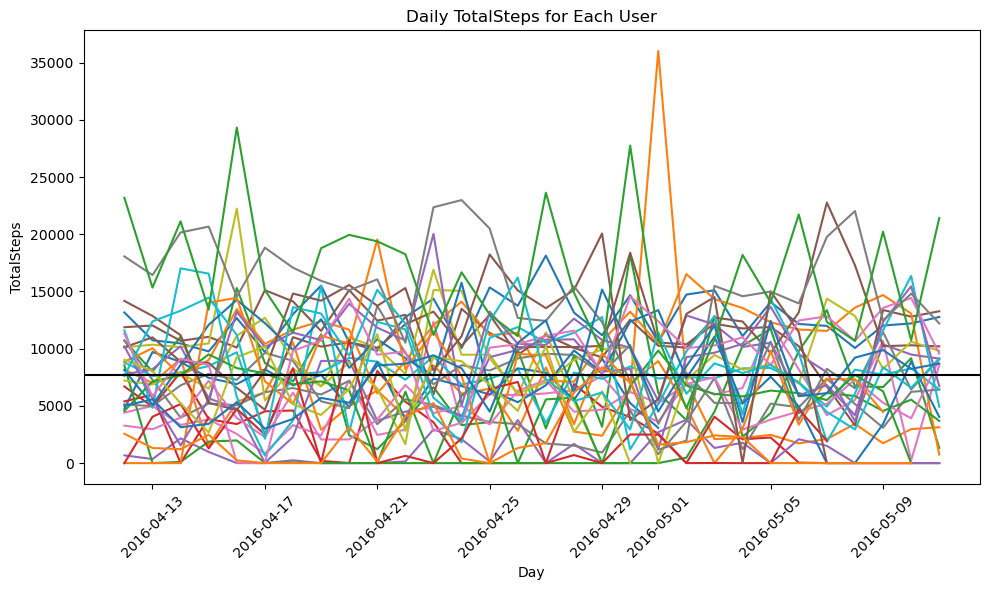

In [283]:
daily_steps = daily_activity.groupby(['Id', 'ActivityDate']).sum().reset_index()

plt.figure(figsize=(10, 6))
for user_id in daily_steps['Id'].unique():
    user_data = daily_steps[daily_steps['Id'] == user_id]
    plt.plot(user_data['ActivityDate'], user_data['TotalSteps'], label=f'ID {user_id}')


avg_daily_steps = daily_steps['TotalSteps'].mean()
plt.axhline(avg_daily_steps, color = "black", label = 'mean of steps')


plt.title('Daily TotalSteps for Each User')
plt.xlabel('Day')
plt.ylabel('TotalSteps')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [62]:
# we can see that the mean of the daily total steps for each user is between close to 10K (see the black line)

## Calories

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


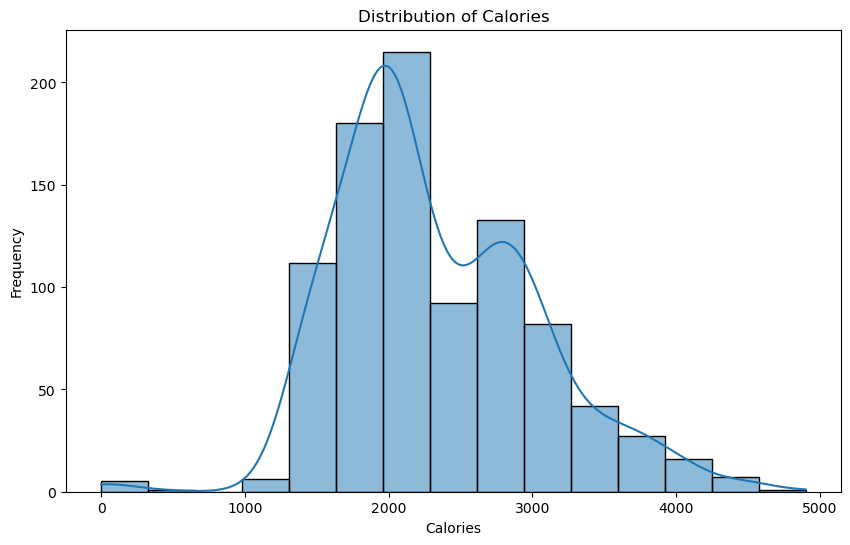

In [284]:
plt.figure(figsize=(10, 6))
sns.histplot(daily_activity['Calories'], kde=True, bins=15)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

In [289]:
daily_activity["DayOfWeek"]= daily_activity["ActivityDate"].dt.day_name()
daily_activity.head()

/var/folders/bc/q2wd2x690p93m182cp8bnly80000gn/T/ipykernel_92530/993710997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_activity["DayOfWeek"]= daily_activity["ActivityDate"].dt.day_name()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


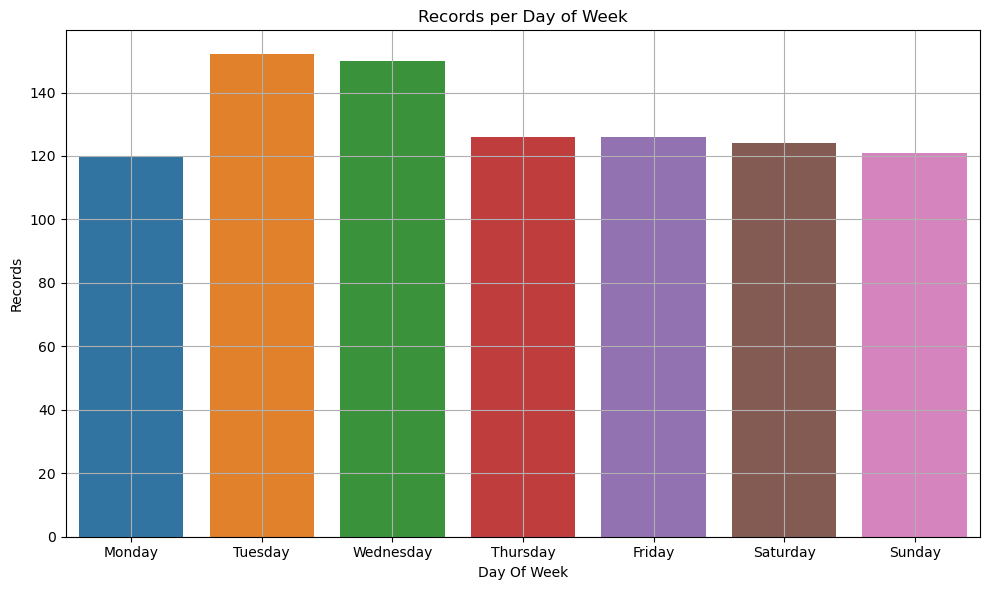

In [288]:
day_count = daily_activity["DayOfWeek"].value_counts().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.figure(figsize=(10, 6))
sns.barplot(x= day_count.index, y=day_count.values)

plt.xlabel('Day Of Week')
plt.ylabel('Records')
plt.title("Records per Day of Week")
plt.grid(True)
plt.tight_layout()
plt.show()

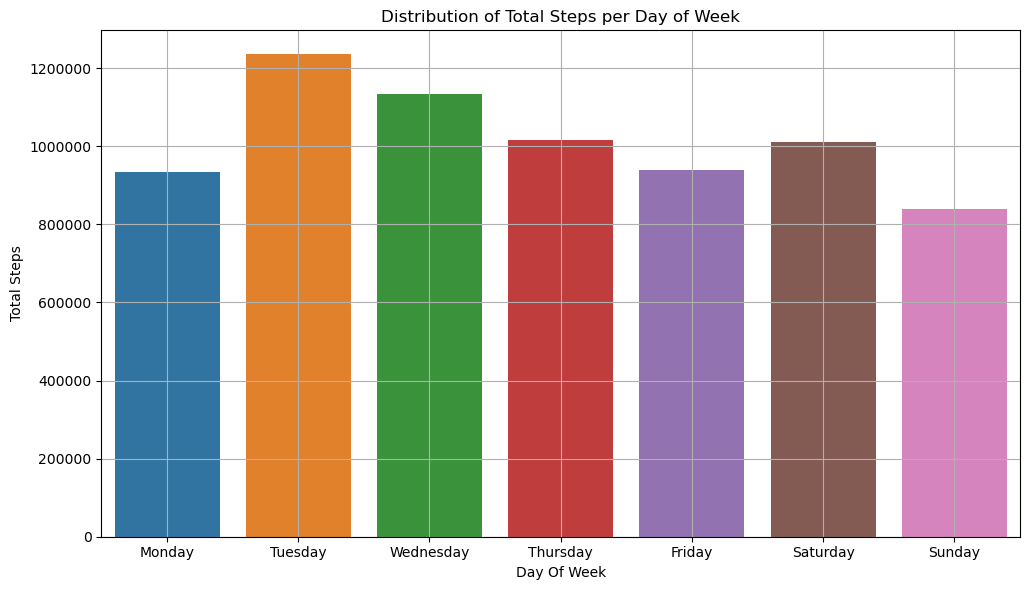

In [290]:
steps_by_day = daily_activity.groupby("DayOfWeek")["TotalSteps"].sum().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.figure(figsize=(10, 6))
sns.barplot(x= steps_by_day.index, y=steps_by_day.values)
plt.xlabel('Day Of Week')
plt.ylabel('Total Steps')
plt.title('Distribution of Total Steps per Day of Week')

plt.grid(True)
plt.tight_layout()
plt.ticklabel_format(style="plain",axis="y")

plt.show()

# X10 power of -6

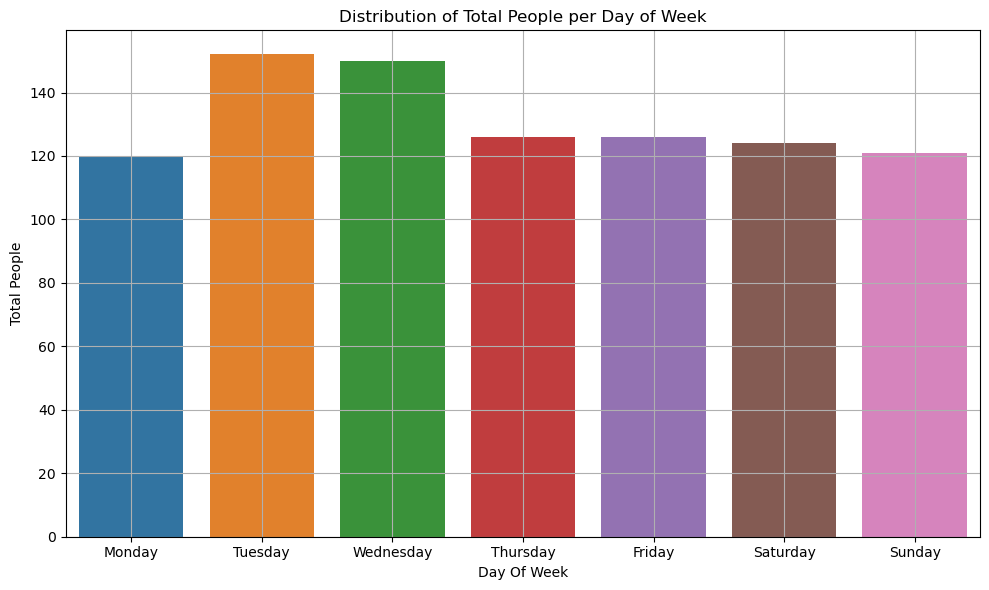

In [291]:
steps_by_day = daily_activity.groupby("DayOfWeek")["Id"].count().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.figure(figsize=(10, 6))
sns.barplot(x= steps_by_day.index, y=steps_by_day.values)
plt.xlabel('Day Of Week')
plt.ylabel('Total People')
plt.title('Distribution of Total People per Day of Week')

plt.grid(True)
plt.tight_layout()
plt.ticklabel_format(style="plain",axis="y")
plt.show()

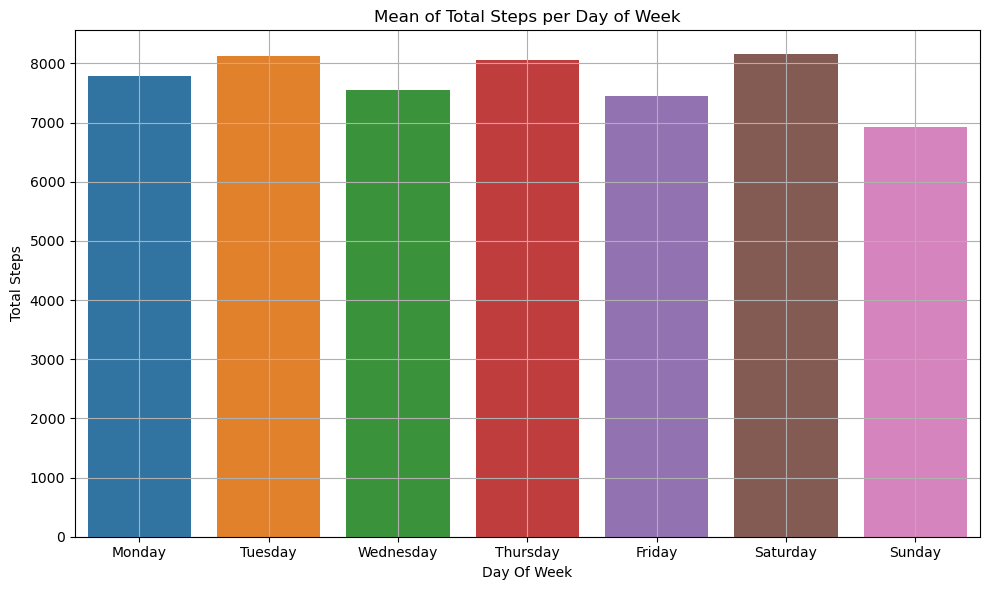

In [292]:
steps_by_day = daily_activity.groupby("DayOfWeek")["TotalSteps"].mean().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.figure(figsize=(10, 6))
sns.barplot(x= steps_by_day.index, y=steps_by_day.values)
plt.xlabel('Day Of Week')
plt.ylabel('Total Steps')
plt.title('Mean of Total Steps per Day of Week')

plt.grid(True)
plt.tight_layout()
plt.ticklabel_format(style="plain",axis="y")

plt.show()


choose mean since looking of sum would not give better analysis

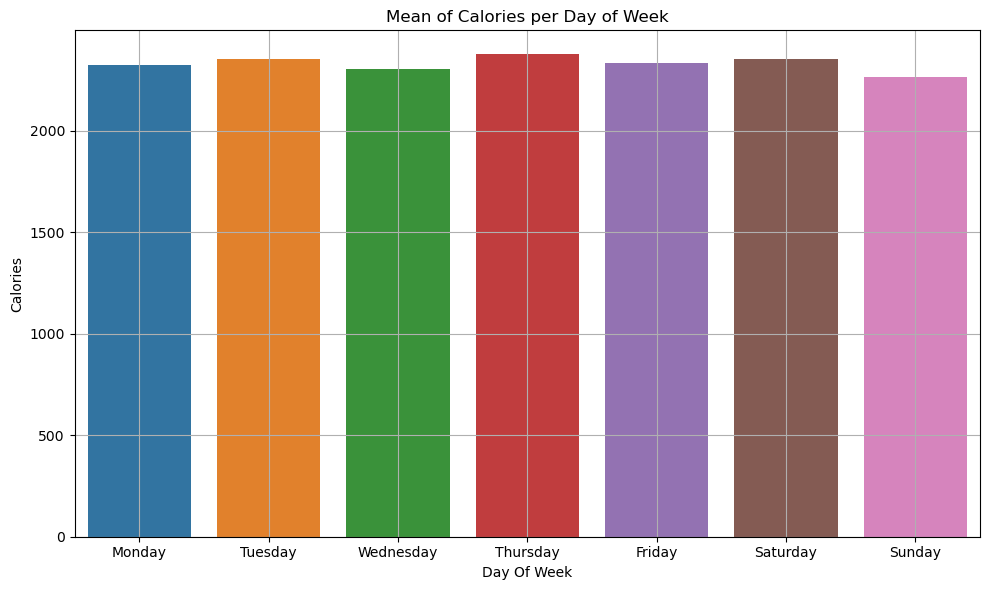

In [293]:
steps_by_day = daily_activity.groupby("DayOfWeek")["Calories"].mean().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.figure(figsize=(10, 6))
sns.barplot(x= steps_by_day.index, y=steps_by_day.values)
plt.xlabel('Day Of Week')
plt.ylabel('Calories')
plt.title('Mean of Calories per Day of Week')

plt.grid(True)
plt.tight_layout()
plt.ticklabel_format(style="plain",axis="y")

plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


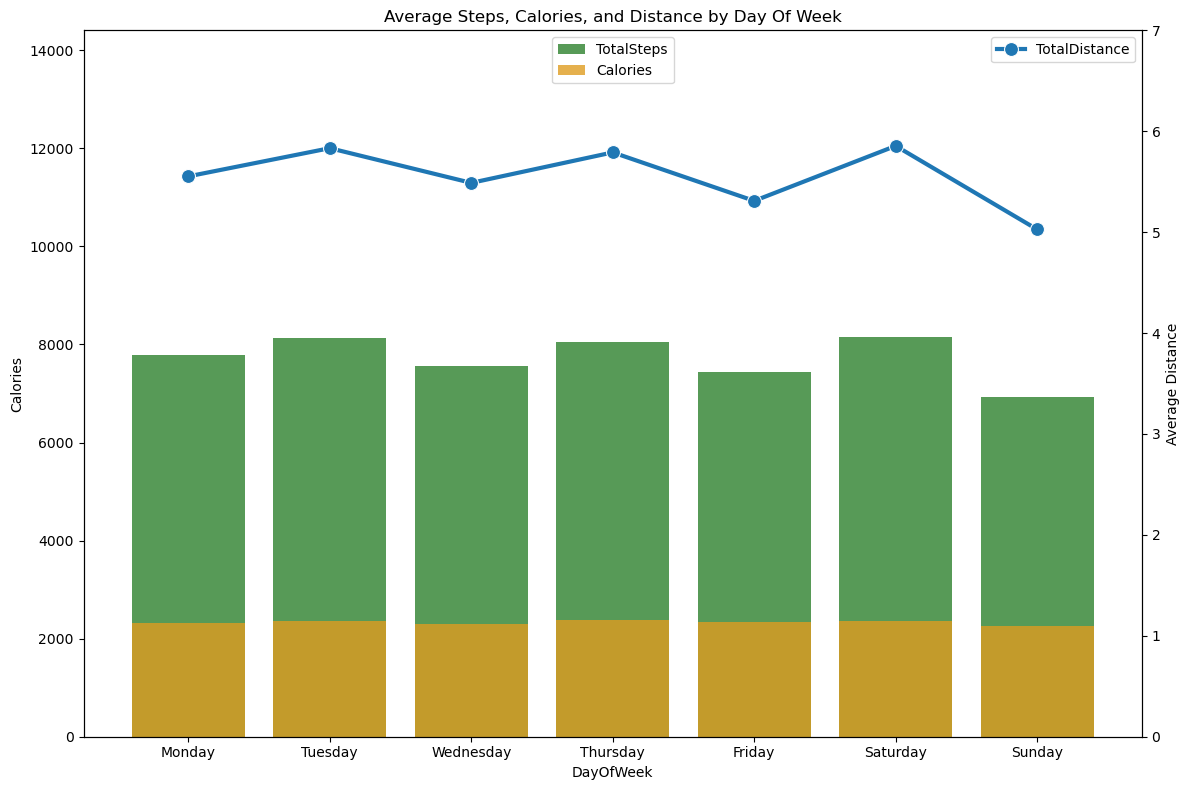

In [327]:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_totalsteps = daily_activity.groupby('DayOfWeek')['TotalSteps'].mean().reindex(week_days)
average_calories = daily_activity.groupby('DayOfWeek')['Calories'].mean().reindex(week_days)
average_dailydistance = daily_activity.groupby('DayOfWeek')['TotalDistance'].mean().reindex(week_days)

plt.figure(figsize=(12, 8))
 
sns.barplot(x=average_totalsteps.index, y=average_totalsteps, color="green",  alpha=0.7, label='TotalSteps')
sns.barplot(x=average_calories.index, y=average_calories, color="orange", alpha=0.8, label='Calories')
plt.ylim(0, daily_activity[['TotalSteps', 'Calories']].max().max() * .40)
plt.legend(loc="upper center")
 
ax2 = plt.twinx()
sns.lineplot(x=average_dailydistance.index, y=average_dailydistance, marker='o', markersize=10, linewidth=3, ax=ax2, label='TotalDistance')
ax2.set_ylim(bottom=0)
ax2.set_ylim(top=7)
ax2.legend(loc='upper right')

plt.title('Average Steps, Calories, and Distance by Day Of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Distance')
plt.tight_layout()
plt.show()

### Hour vs Calories

In [326]:
hourly_data.head()

,Id,ActivityHour,Calories,Hour
0,1503960366,2016-04-12 00:00:00,81,0
1,1503960366,2016-04-12 01:00:00,61,1
2,1503960366,2016-04-12 02:00:00,59,2
3,1503960366,2016-04-12 03:00:00,47,3
4,1503960366,2016-04-12 04:00:00,48,4


In [295]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   Calories      22099 non-null  int64         
 3   Hour          22099 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(2)
memory usage: 604.4 KB


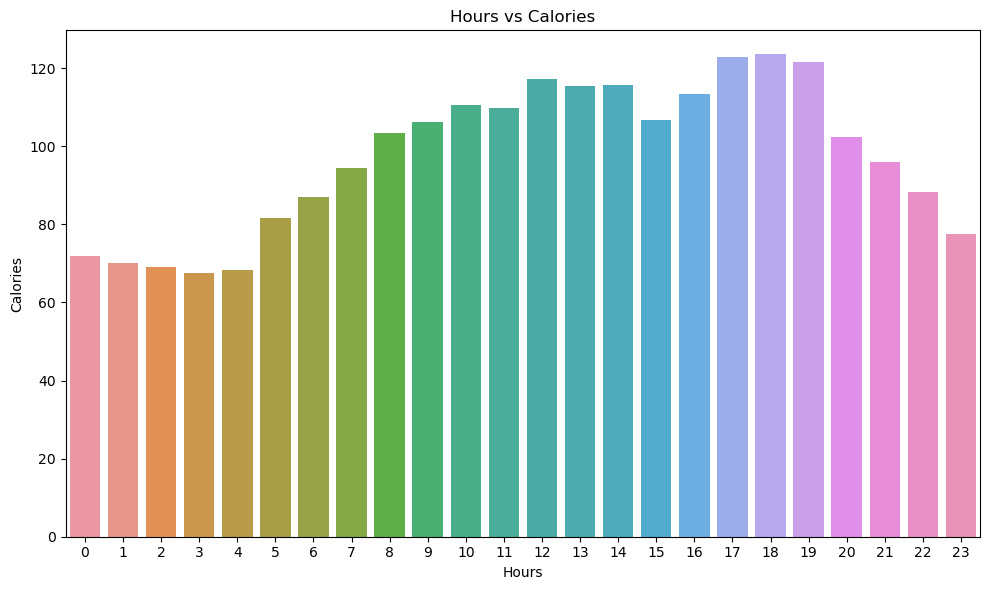

In [296]:
hourly_data['ActivityHour'] = pd.to_datetime(hourly_data['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
hourly_data["Hour"] = hourly_data["ActivityHour"].dt.hour
calories_by_hour = hourly_data.groupby("Hour")["Calories"].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x= calories_by_hour.index, y=calories_by_hour.values)
plt.xlabel('Hours')
plt.ylabel('Calories')
plt.title('Hours vs Calories')


plt.tight_layout()
plt.ticklabel_format(style="plain",axis="y")

plt.show()


##  Scatter Diagrams

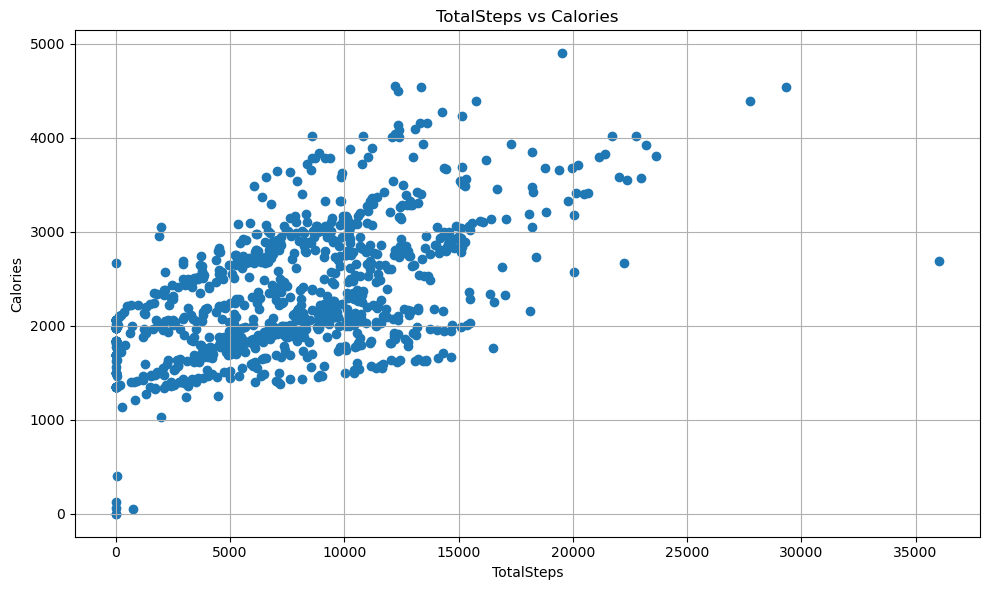

In [297]:
plt.figure(figsize=(10, 6))
 
plt.scatter(daily_activity['TotalSteps'], daily_activity['Calories'])

plt.title('TotalSteps vs Calories')
plt.xlabel('TotalSteps')
plt.ylabel('Calories')
plt.grid(True)
plt.tight_layout()
plt.show()

In [298]:
daily_activity[ ['TotalSteps', 'Calories'] ].corr()

,TotalSteps,Calories
TotalSteps,1.000000,0.582484
Calories,0.582484,1.000000


as one can see we can't directly say there is a strong correlation between total steps vs calories so instead search correlation for every uniqe person's total steps vs clories

## Correlation

In [329]:
correlation_matrix = daily_activity.iloc[:,2:].corr()
print(correlation_matrix)

ValueError: could not convert string to float: 'Tuesday'

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

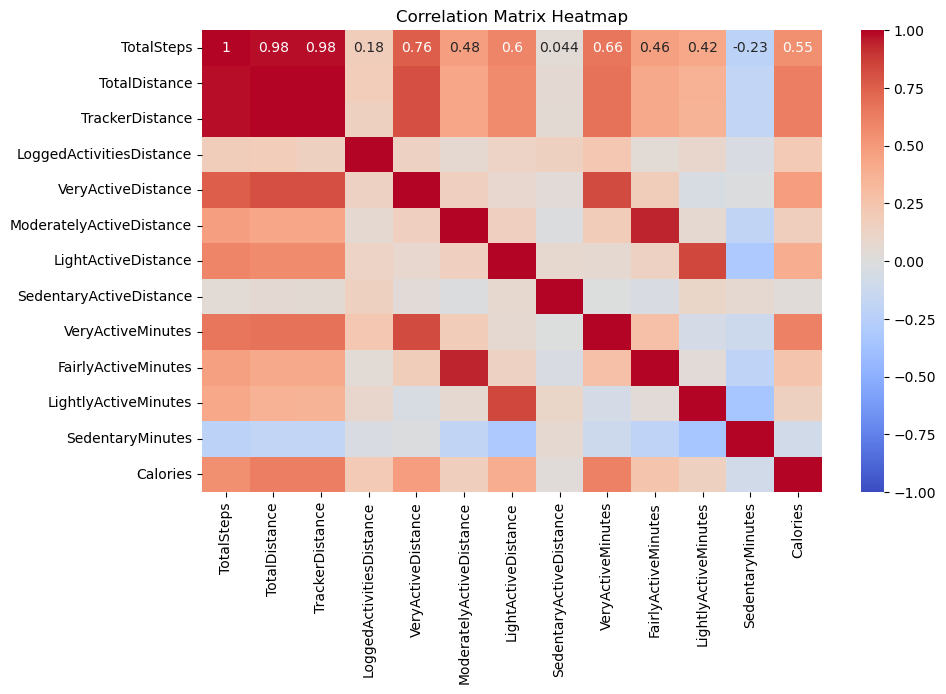

In [330]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')

### Looking for each user

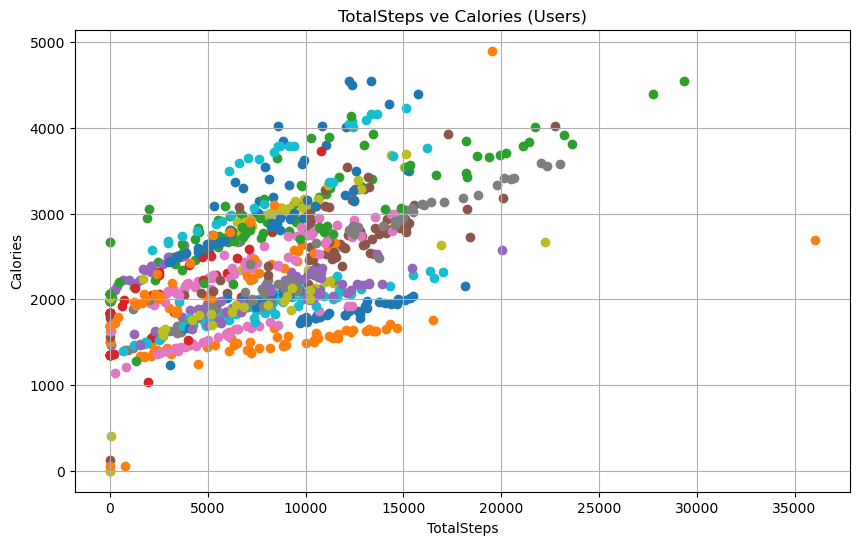

In [301]:
plt.figure(figsize=(10, 6))
for user_id in daily_activity['Id'].unique():
    user_data = daily_activity[daily_activity['Id'] == user_id]
    plt.scatter(user_data['TotalSteps'], user_data['Calories'], label=f'ID {user_id}')

plt.title('TotalSteps ve Calories (Users)')
plt.xlabel('TotalSteps')
plt.ylabel('Calories')
plt.grid(True)
plt.show()

In [302]:
unique_ids = daily_activity['Id'].unique()

correlations = []
for user_id in unique_ids:
    user_data = daily_activity[daily_activity['Id'] == user_id]
    correlation = user_data['TotalSteps'].corr(user_data['Calories'])
    correlations.append((user_id, correlation))

correlations.sort(key=lambda x: x[1], reverse=True)
 
for user_id, correlation in correlations:
    print(f"ID {user_id}: Corr Coef = {correlation}")

ID 1844505072: Corr Coef = 0.9955581996259133
ID 8053475328: Corr Coef = 0.9950703941983748
ID 4319703577: Corr Coef = 0.9905732334770839
ID 2026352035: Corr Coef = 0.9872011313694552
ID 1927972279: Corr Coef = 0.9831348170579401
ID 8583815059: Corr Coef = 0.9826148296626012
ID 4702921684: Corr Coef = 0.9825120666389248
ID 2320127002: Corr Coef = 0.9793875547639558
ID 5553957443: Corr Coef = 0.9755240158570411
ID 6962181067: Corr Coef = 0.9684776339510016
ID 1624580081: Corr Coef = 0.9651147810331298
ID 4445114986: Corr Coef = 0.9535262522148017
ID 1503960366: Corr Coef = 0.9469509181033783
ID 4020332650: Corr Coef = 0.9348401986623482
ID 7086361926: Corr Coef = 0.9285684242999515
ID 6117666160: Corr Coef = 0.9166512531728956
ID 5577150313: Corr Coef = 0.9162756875231074
ID 1644430081: Corr Coef = 0.9137224529048197
ID 4388161847: Corr Coef = 0.9029057318692544
ID 7007744171: Corr Coef = 0.8875945808287484
ID 6775888955: Corr Coef = 0.859114614255286
ID 8378563200: Corr Coef = 0.844792

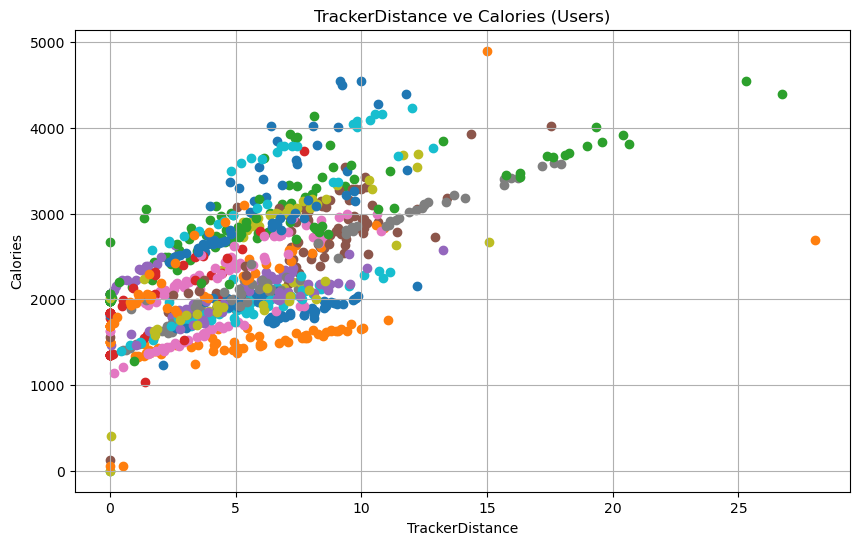

In [303]:
plt.figure(figsize=(10, 6))
for user_id in daily_activity['Id'].unique():
    user_data = daily_activity[daily_activity['Id'] == user_id]
    plt.scatter(user_data['TrackerDistance'], user_data['Calories'], label=f'ID {user_id}')

plt.title('TrackerDistance ve Calories (Users)')
plt.xlabel('TrackerDistance')
plt.ylabel('Calories')
plt.grid(True)
plt.show()

now we can see strong correlation, so we can conclude that total steps and tracker distance vs calories are related if we look uniquely

#### Create pie chart showing Percentage of Activity in Minutes


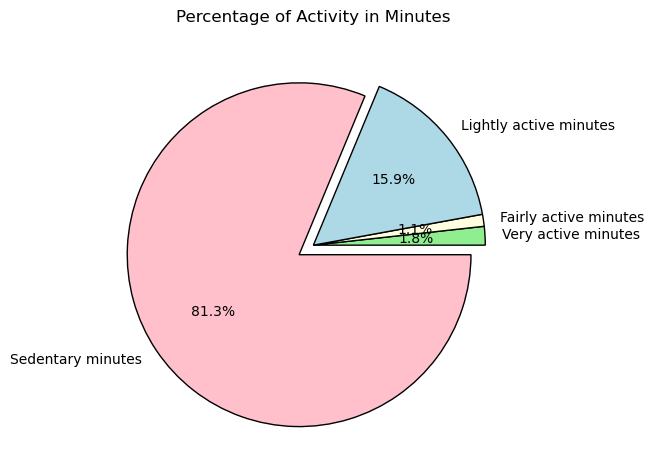

In [304]:
very_active_mins = daily_activity["VeryActiveMinutes"].sum()
fairly_active_mins = daily_activity["FairlyActiveMinutes"].sum()
lightly_active_mins = daily_activity["LightlyActiveMinutes"].sum()
sedentary_mins = daily_activity["SedentaryMinutes"].sum()
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightgreen", "lightyellow", "lightblue", "pink"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

# https://github.com/NLL369/FitBit-Fitness-Tracker-Data-Project/blob/main/Google%20Data%20Analytics%20Capstone%20-%20Bellabeat%20Project.ipynb

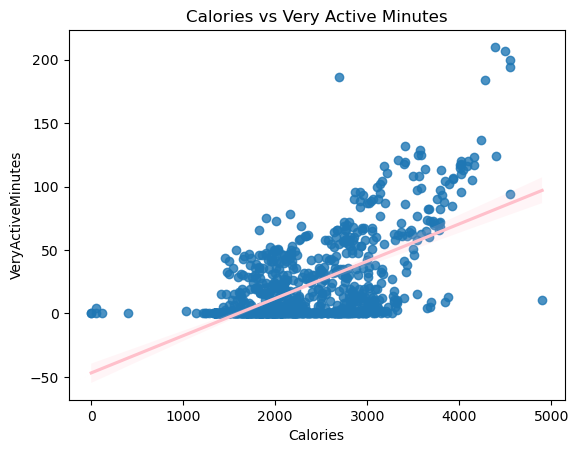

,Calories,VeryActiveMinutes
Calories,1.000000,0.620059
VeryActiveMinutes,0.620059,1.000000


In [305]:
# calories vs very active minutes
sns.regplot(x='Calories', y='VeryActiveMinutes', data=daily_activity, line_kws={'color': 'pink'})
plt.title('Calories vs Very Active Minutes')
plt.show()
daily_activity[ ['Calories', 'VeryActiveMinutes'] ].corr()

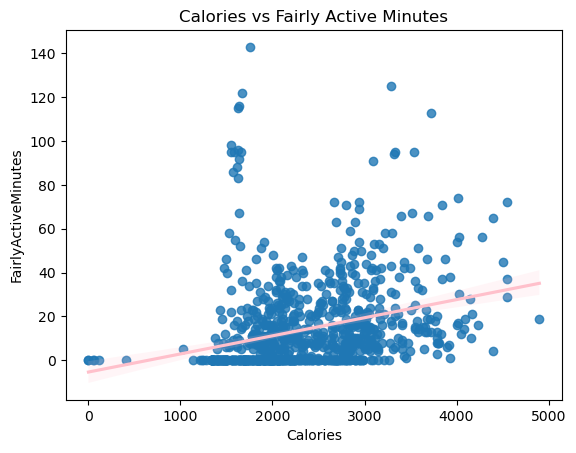

,Calories,FairlyActiveMinutes
Calories,1.000000,0.287164
FairlyActiveMinutes,0.287164,1.000000


In [306]:
# calories vs fairly active minutes 
sns.regplot(x='Calories', y='FairlyActiveMinutes', data=daily_activity, line_kws={'color': 'pink'})
plt.title('Calories vs Fairly Active Minutes')
plt.show()
daily_activity[ ['Calories', 'FairlyActiveMinutes'] ].corr()

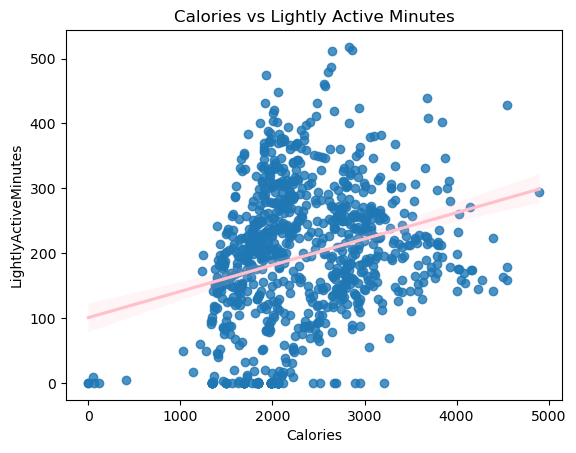

,Calories,LightlyActiveMinutes
Calories,1.000000,0.260629
LightlyActiveMinutes,0.260629,1.000000


In [307]:
# calories vs lightly active minutes 
sns.regplot(x='Calories', y='LightlyActiveMinutes', data=daily_activity, line_kws={'color': 'pink'})
plt.title('Calories vs Lightly Active Minutes')
plt.show()
daily_activity[ ['Calories', 'LightlyActiveMinutes'] ].corr()

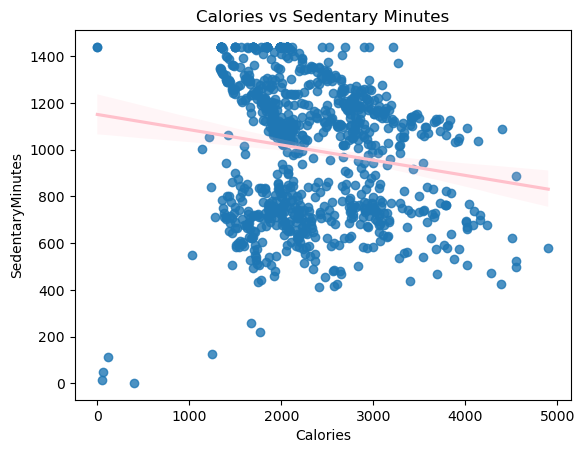

,Calories,SedentaryMinutes
Calories,1.000000,-0.154706
SedentaryMinutes,-0.154706,1.000000


In [308]:
# calories vs sedentary minutes 
sns.regplot(x='Calories', y='SedentaryMinutes', data=daily_activity, line_kws={'color': 'pink'})
plt.title('Calories vs Sedentary Minutes')
plt.show()
daily_activity[ ['Calories', 'SedentaryMinutes'] ].corr()

Look at the scatter plots of Sedentary and Very Active Minutes per user to see a difference

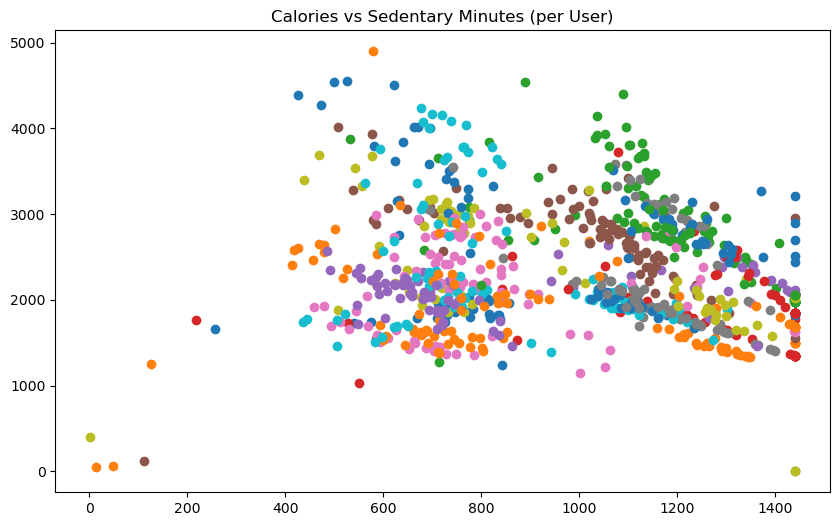

In [322]:
plt.figure(figsize=(10, 6))
for user_id in daily_activity['Id'].unique():
    user_data = daily_activity[daily_activity['Id'] == user_id]
    plt.scatter(user_data['SedentaryMinutes'], user_data['Calories'], label=f'ID {user_id}')
#sns.regplot(x='Calories', y='TotalSteps', data=daily_activity_cleaned, line_kws={'color': 'pink'})
plt.title('Calories vs Sedentary Minutes (per User)')
plt.show()

# do each for different activiy minutes or distances

In [310]:
unique_ids = daily_activity['Id'].unique()

correlations = []
for user_id in unique_ids:
    user_data = daily_activity[daily_activity['Id'] == user_id]
    correlation = user_data['SedentaryMinutes'].corr(user_data['Calories'])
    correlations.append((user_id, correlation))

correlations.sort(key=lambda x: x[1], reverse=True)
 
for user_id, correlation in correlations:
    print(f"ID {user_id}: Corr Coef = {correlation}")

ID 2347167796: Corr Coef = 0.7621611053560048
ID 3977333714: Corr Coef = 0.7348323056475782
ID 4057192912: Corr Coef = 0.5319850617361997
ID 7007744171: Corr Coef = 0.41840706545360806
ID 3372868164: Corr Coef = 0.27193116236334264
ID 5553957443: Corr Coef = 0.22967367729325414
ID 1503960366: Corr Coef = 0.19229298883115414
ID 8378563200: Corr Coef = 0.09163860917448882
ID 6775888955: Corr Coef = -0.08358356286942065
ID 8792009665: Corr Coef = -0.15476833897417291
ID 1644430081: Corr Coef = -0.1598108018479561
ID 4388161847: Corr Coef = -0.16678713972947515
ID 4319703577: Corr Coef = -0.3660829571346586
ID 1927972279: Corr Coef = -0.42096428521742874
ID 4445114986: Corr Coef = -0.42811381763359824
ID 8583815059: Corr Coef = -0.43961379891008856
ID 6117666160: Corr Coef = -0.45263211838661904
ID 6290855005: Corr Coef = -0.5227705558299454
ID 1844505072: Corr Coef = -0.5537915975751343
ID 5577150313: Corr Coef = -0.5810019945650549
ID 6962181067: Corr Coef = -0.6260270056233594
ID 805347

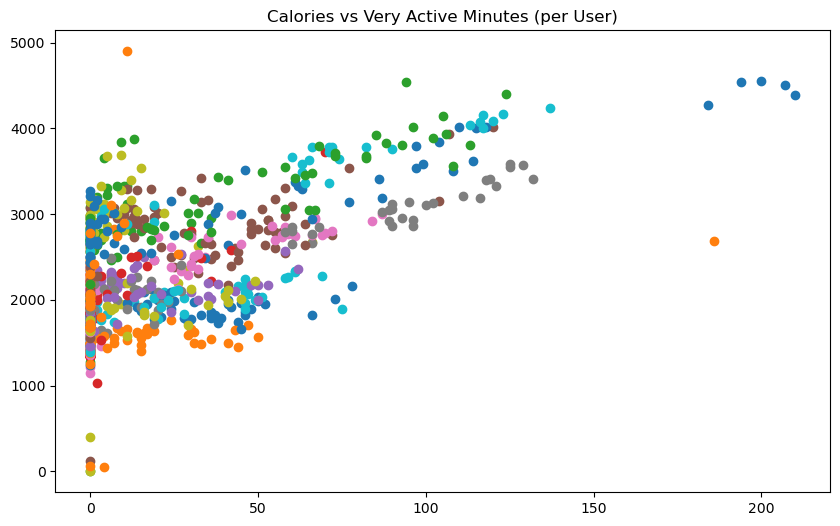

In [323]:
plt.figure(figsize=(10, 6))
for user_id in daily_activity['Id'].unique():
    user_data = daily_activity[daily_activity['Id'] == user_id]
    plt.scatter(user_data['VeryActiveMinutes'], user_data['Calories'], label=f'ID {user_id}')
#sns.regplot(x='Calories', y='TotalSteps', data=daily_activity_cleaned, line_kws={'color': 'pink'})
plt.title('Calories vs Very Active Minutes (per User)')
plt.show()

In [312]:
unique_ids = daily_activity['Id'].unique()

correlations = []
for user_id in unique_ids:
    user_data = daily_activity[daily_activity['Id'] == user_id]
    correlation = user_data['VeryActiveMinutes'].corr(user_data['Calories'])
    correlations.append((user_id, correlation))

correlations.sort(key=lambda x: x[1], reverse=True)
 
for user_id, correlation in correlations:
    print(f"ID {user_id}: Corr Coef = {correlation}")

ID 8378563200: Corr Coef = 0.9685941282991414
ID 8053475328: Corr Coef = 0.9643616884268391
ID 1624580081: Corr Coef = 0.9572696564917234
ID 8877689391: Corr Coef = 0.9115647716954075
ID 5553957443: Corr Coef = 0.9007705065925343
ID 5577150313: Corr Coef = 0.8944078865136075
ID 4388161847: Corr Coef = 0.8840439707369365
ID 6775888955: Corr Coef = 0.8408612829652585
ID 7086361926: Corr Coef = 0.8324855493455078
ID 6962181067: Corr Coef = 0.7341805830339689
ID 2022484408: Corr Coef = 0.7099150865552455
ID 7007744171: Corr Coef = 0.651485703935823
ID 8792009665: Corr Coef = 0.5749275814458512
ID 1503960366: Corr Coef = 0.5488334411279095
ID 4319703577: Corr Coef = 0.5461871548367055
ID 8253242879: Corr Coef = 0.5285298180794721
ID 2347167796: Corr Coef = 0.5281183135722972
ID 4558609924: Corr Coef = 0.5172437676919542
ID 1644430081: Corr Coef = 0.4937932304457651
ID 4020332650: Corr Coef = 0.48672689896695626
ID 3372868164: Corr Coef = 0.4515261740767623
ID 4445114986: Corr Coef = 0.42646

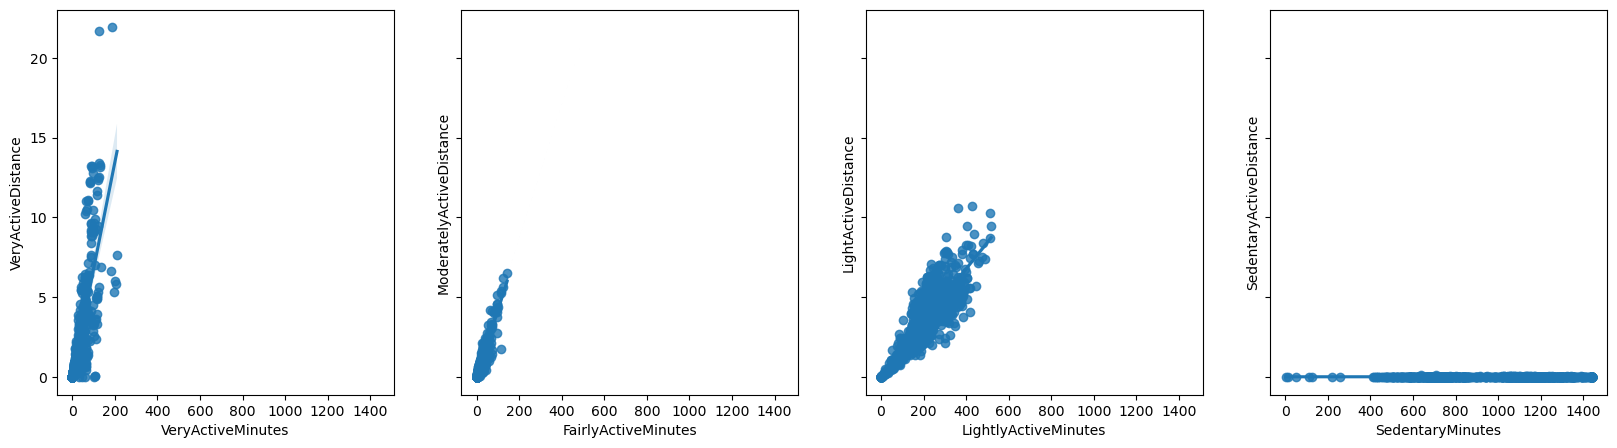

In [313]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True, sharex=True)

sns.regplot(data=daily_activity,
            x='VeryActiveMinutes',
            y='VeryActiveDistance',
            ax=axes[0])

sns.regplot(data=daily_activity,
            x='FairlyActiveMinutes',
            y='ModeratelyActiveDistance',
            ax=axes[1])

sns.regplot(data=daily_activity,
            x='LightlyActiveMinutes',
            y='LightActiveDistance',
            ax=axes[2])

sns.regplot(data=daily_activity,
            x='SedentaryMinutes',
            y='SedentaryActiveDistance',
            ax=axes[3]);


Seems like the distance taken for a certain amount of time is greater as the type of the activity gets more active.

In [321]:
print(daily_activity[ ['VeryActiveMinutes', 'VeryActiveDistance'] ].corr())
print(daily_activity[ ['FairlyActiveMinutes', 'ModeratelyActiveDistance'] ].corr())
print(daily_activity[ ['LightlyActiveMinutes', 'LightActiveDistance'] ].corr())
print(daily_activity[ ['SedentaryMinutes', 'SedentaryActiveDistance'] ].corr())

                    VeryActiveMinutes  VeryActiveDistance
VeryActiveMinutes            1.000000            0.825638
VeryActiveDistance           0.825638            1.000000
                          FairlyActiveMinutes  ModeratelyActiveDistance
FairlyActiveMinutes                  1.000000                  0.946563
ModeratelyActiveDistance             0.946563                  1.000000
                      LightlyActiveMinutes  LightActiveDistance
LightlyActiveMinutes              1.000000             0.883399
LightActiveDistance               0.883399             1.000000
                         SedentaryMinutes  SedentaryActiveDistance
SedentaryMinutes                 1.000000                 0.031411
SedentaryActiveDistance          0.031411                 1.000000


#### Distance Plots

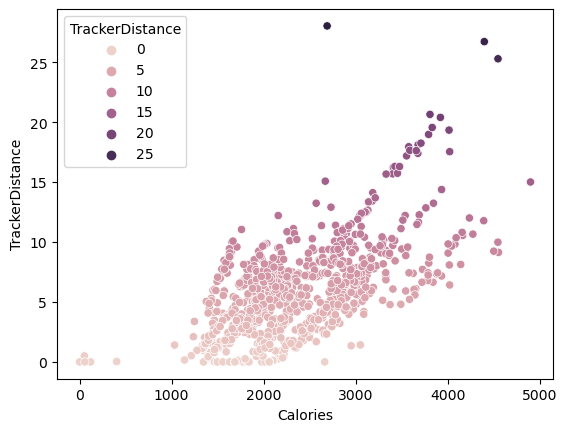

In [316]:
sns.scatterplot(data=daily_activity,
                x='Calories',
                y='TrackerDistance',
                hue='TrackerDistance')
plt.xlabel("Calories");


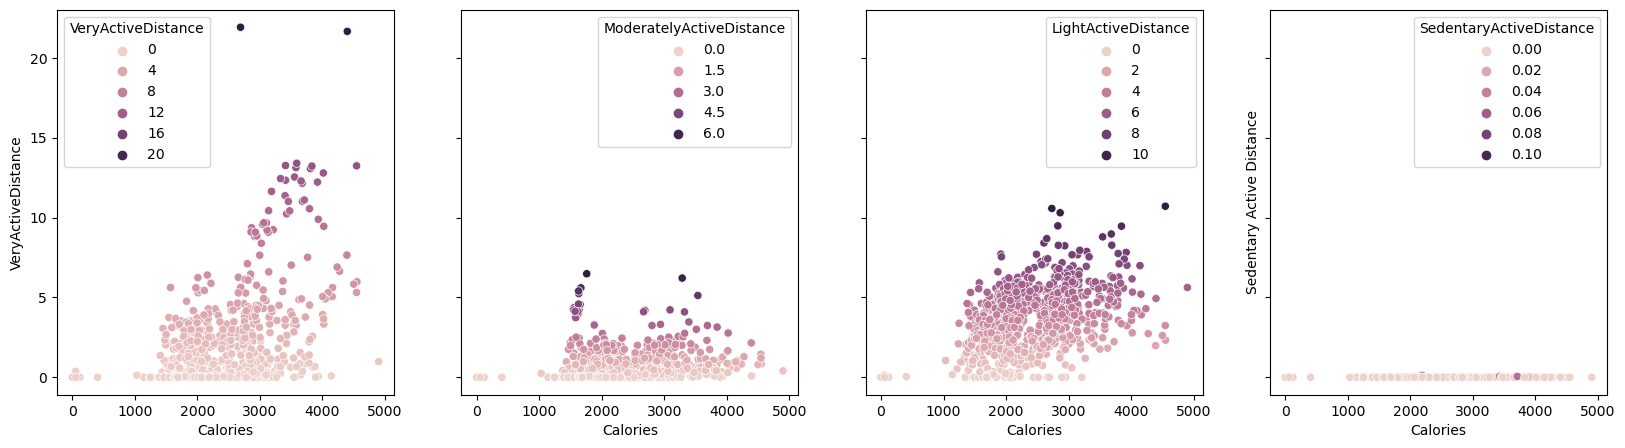

In [317]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True, sharex=True)

sns.scatterplot(data=daily_activity,
                x='Calories',
                y='VeryActiveDistance',
                hue='VeryActiveDistance', ax=axes[0])
plt.xlabel("Calories")
plt.ylabel("Very Active Distance");

sns.scatterplot(data=daily_activity,
                x='Calories',
                y='ModeratelyActiveDistance',
                hue='ModeratelyActiveDistance', ax=axes[1])
plt.xlabel("Calories")
plt.ylabel("Moderately Active Distance");


sns.scatterplot(data=daily_activity,
                x='Calories',
                y='LightActiveDistance',
                hue='LightActiveDistance', ax=axes[2])
plt.xlabel("Calories")
plt.ylabel("Light Active Distance");


sns.scatterplot(data=daily_activity,
                x='Calories',
                y='SedentaryActiveDistance',
                hue='SedentaryActiveDistance', ax=axes[3])
plt.xlabel("Calories")
plt.ylabel("Sedentary Active Distance");


In [267]:
#compare 4 graphs above with the graphs that show calories vs active min per user(very active and sedentary)

In [265]:
#mean_of_calories = daily_activity_cleaned["Calories"].mean()
#mean_of_calories = daily_activity_cleaned["TotalSteps"].mean()
#mean_of_calories = daily_activity_cleaned["TotalDistance"].mean()
# ayrıca burdaki: https://github.com/PriyalChotwani/Fitbit-DataAnalysis/blob/main/Images/Fitbit_Q2.png grapiği çiz
#mean_of_daily_steps = daily_steps.mean()
#print(mean_of_daily_steps)

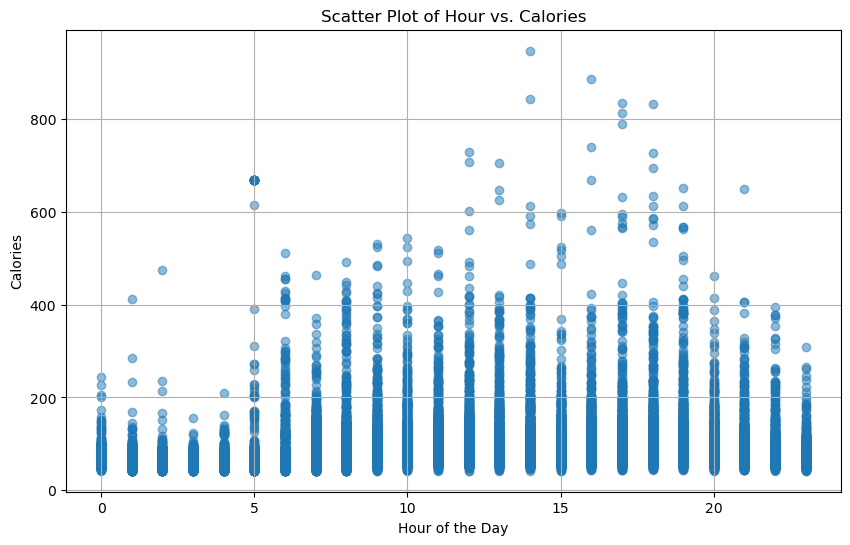

          Calories      Hour
Calories  1.000000  0.180869
Hour      0.180869  1.000000


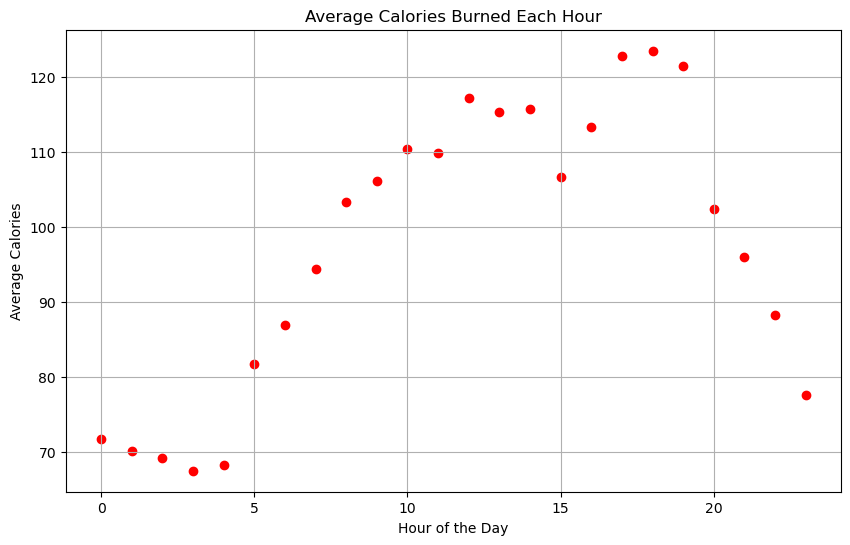

          Calories      Hour
Calories  1.000000  0.576947
Hour      0.576947  1.000000


In [318]:
hourly_data['ActivityHour'] = pd.to_datetime(hourly_data['ActivityHour'])

# Extract hour from ActivityHour
hourly_data['Hour'] = hourly_data['ActivityHour'].dt.hour

# Scatter plot of Hour vs. Calories
plt.figure(figsize=(10, 6))
plt.scatter(hourly_data['Hour'], hourly_data['Calories'], alpha=0.5)
plt.title('Scatter Plot of Hour vs. Calories')
plt.xlabel('Hour of the Day')
plt.ylabel('Calories')
plt.grid(True)
plt.show()
print(hourly_data[ ['Calories', 'Hour'] ].corr())

# Aggregate calories by hour to see average calories burned each hour
hourly_avg_calories = hourly_data.groupby('Hour')['Calories'].mean().reset_index()

# Scatter plot of average Calories vs. Hour
plt.figure(figsize=(10, 6))
plt.scatter(hourly_avg_calories['Hour'], hourly_avg_calories['Calories'], color='r')
plt.title('Average Calories Burned Each Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Calories')
plt.grid(True)
plt.show()
print(hourly_avg_calories[ ['Calories', 'Hour'] ].corr())




We can't see a strong correlation so lets find a relevant interval which is approximatly between 4 to 13 to search for a better correlation

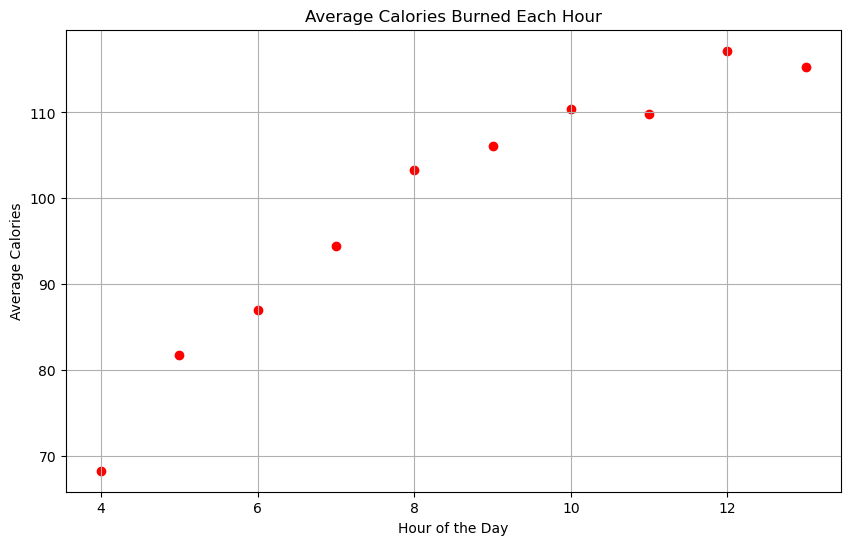

          Calories      Hour
Calories  1.000000  0.955761
Hour      0.955761  1.000000


In [196]:
filtered_data= hourly_avg_calories[(hourly_avg_calories["Hour"] >= 4) & (hourly_avg_calories["Hour"] <= 13)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Hour'], filtered_data['Calories'], color='r')
plt.title('Average Calories Burned Each Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Calories')
plt.grid(True)
plt.show()
print(filtered_data[ ['Calories', 'Hour'] ].corr())


/var/folders/bc/q2wd2x690p93m182cp8bnly80000gn/T/ipykernel_92530/55323018.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  minuteCaloriesWide['Hour'] = pd.to_datetime(minuteCaloriesWide['ActivityHour']).dt.hour


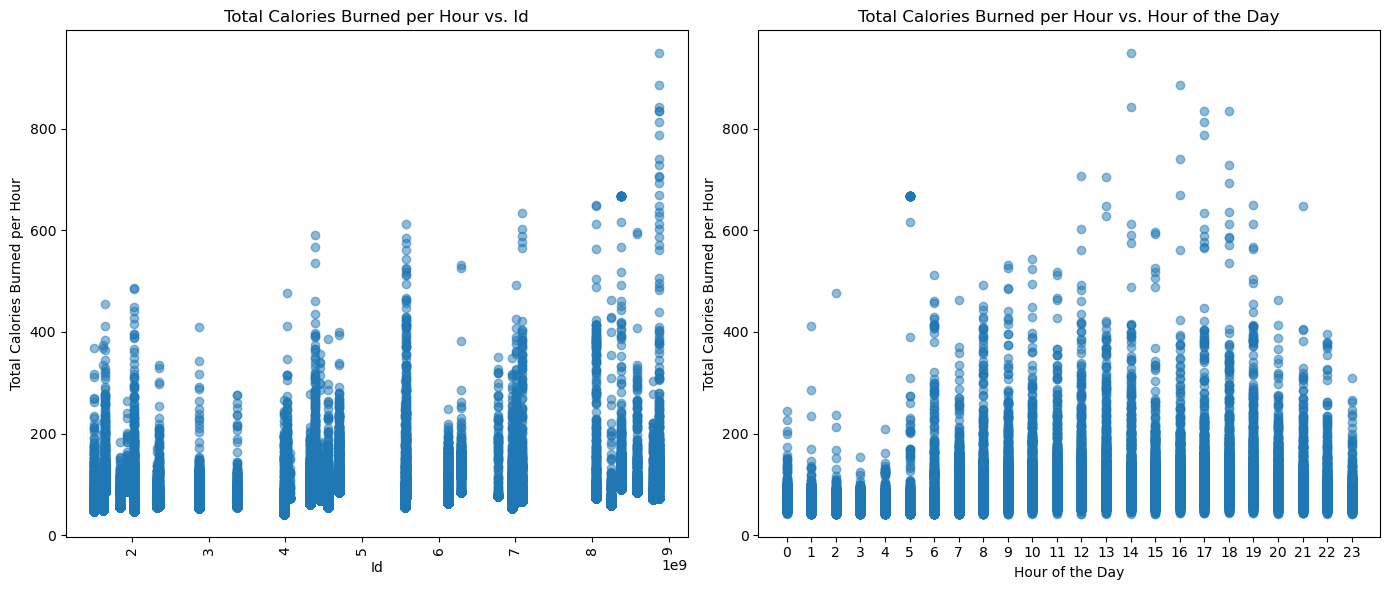

In [319]:

# Calculate the total calories burned each hour
minuteCaloriesWide['TotalCalories'] = minuteCaloriesWide.loc[:, 'Calories00':'Calories59'].sum(axis=1)

# Extract hour from ActivityHour
minuteCaloriesWide['Hour'] = pd.to_datetime(minuteCaloriesWide['ActivityHour']).dt.hour

# Plot relationships
plt.figure(figsize=(14, 6))

# Scatter plot of Id vs. Total Calories
plt.subplot(1, 2, 1)
plt.scatter(minuteCaloriesWide['Id'], minuteCaloriesWide['TotalCalories'], alpha=0.5)
plt.title('Total Calories Burned per Hour vs. Id')
plt.xlabel('Id')
plt.ylabel('Total Calories Burned per Hour')
plt.xticks(rotation=90)

# Scatter plot of Hour vs. Total Calories
plt.subplot(1, 2, 2)
plt.scatter(minuteCaloriesWide['Hour'], minuteCaloriesWide['TotalCalories'], alpha=0.5)
plt.title('Total Calories Burned per Hour vs. Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Calories Burned per Hour')
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()
